In [2]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import caffe.draw
from caffe.proto import caffe_pb2
from google.protobuf import text_format
import cv2
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [3]:
glyph_directory = u'C:\\Users\\Mikhail\\Documents\\Diploma\\Images\\network_inputs_black\\'

In [4]:
filenames = os.listdir(glyph_directory)

In [5]:
unique_names = set([filename[:filename.find('_')] for filename in filenames])

In [9]:
unique_names_list = list(unique_names)

### Число штрихов по unicode

In [19]:
from cjklib.characterlookup import CharacterLookup
cjk = CharacterLookup('C')

In [22]:
stroke_numbers = []
for hier_name in unique_names_list:
    try:
        stroke_numbers.append(cjk.getStrokeCount(hier_name))
    except: 
        pass

In [26]:
unique_stroke_numbers = set(stroke_numbers)

In [33]:
buckets = [0] * (max(unique_stroke_numbers) - min(unique_stroke_numbers) + 2)

In [35]:
for stroke_number in stroke_numbers:
    buckets[stroke_number] += 1

построим гистограмму

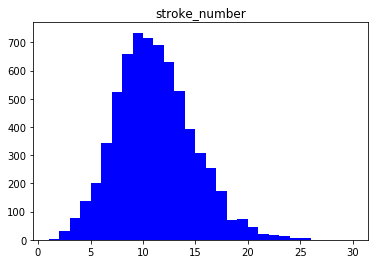

In [55]:
%inline

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(stroke_numbers,np.arange(1, 31, 1), color='b')  # plt.hist passes it's arguments to np.histogram
plt.savefig('stroke_number.jpg')
plt.title("stroke_number")
plt.show()

### Разбить сет по штрихам

In [63]:
from shutil import copyfile, rmtree

glyph_directory = u'C:\\Users\\Mikhail\\Documents\\Diploma\\Images\\network_inputs_white\\'
strokes_directory = u'C:\\Users\\Mikhail\\Documents\\Diploma\\Images\\network_inputs_white_by_strokes\\'

In [65]:
for index in range(1,31):
    if os.path.exists(strokes_directory + str(index)):
        rmtree(strokes_directory + str(index))
    os.mkdir(strokes_directory + str(index))

In [66]:
for filename in filenames:
    hier_name = filename[:filename.find('_')]
    try:      
        copyfile(glyph_directory + filename, strokes_directory + str(cjk.getStrokeCount(hier_name)) + u'\\' + filename)
    except:
        pass